In [133]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge



In [134]:
data = pd.read_csv('./DB/diamonds.csv', sep=',')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [136]:
data = data.drop(['Unnamed: 0'], axis='columns')

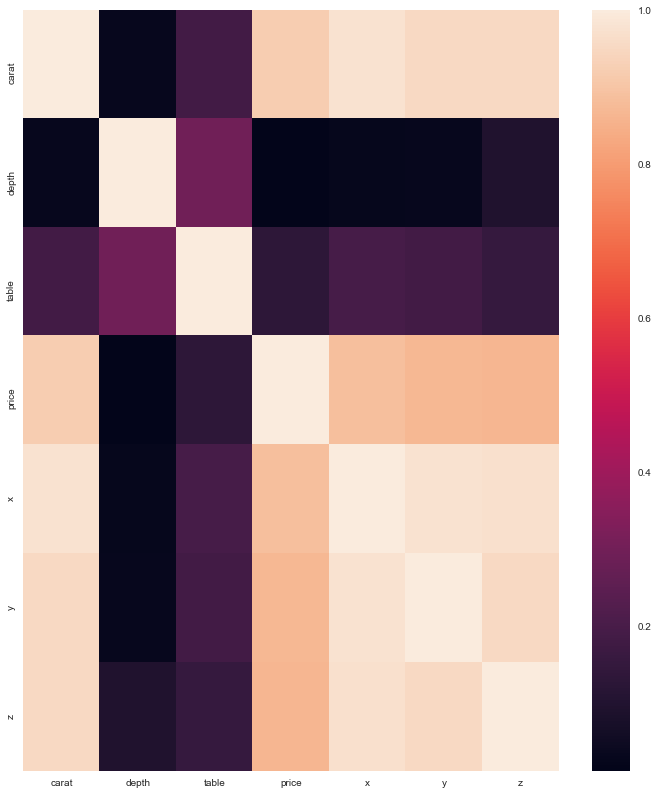

In [137]:
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [138]:
data = data.drop(['x', 'y', 'z'], axis='columns')

In [139]:
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [140]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
dtype: object

In [141]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [142]:
cuts = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
colors = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
clarities = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

In [143]:
df = data.copy()
df['cut'] = data['cut'].map(cuts)
df['color'] = data['color'].map(colors)
df['clarity'] = data['clarity'].map(clarities)

In [144]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,5,2,2,61.5,55.0,326
1,0.21,4,2,3,59.8,61.0,326
2,0.23,2,2,5,56.9,65.0,327
3,0.29,4,6,4,62.4,58.0,334
4,0.31,2,7,2,63.3,58.0,335


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


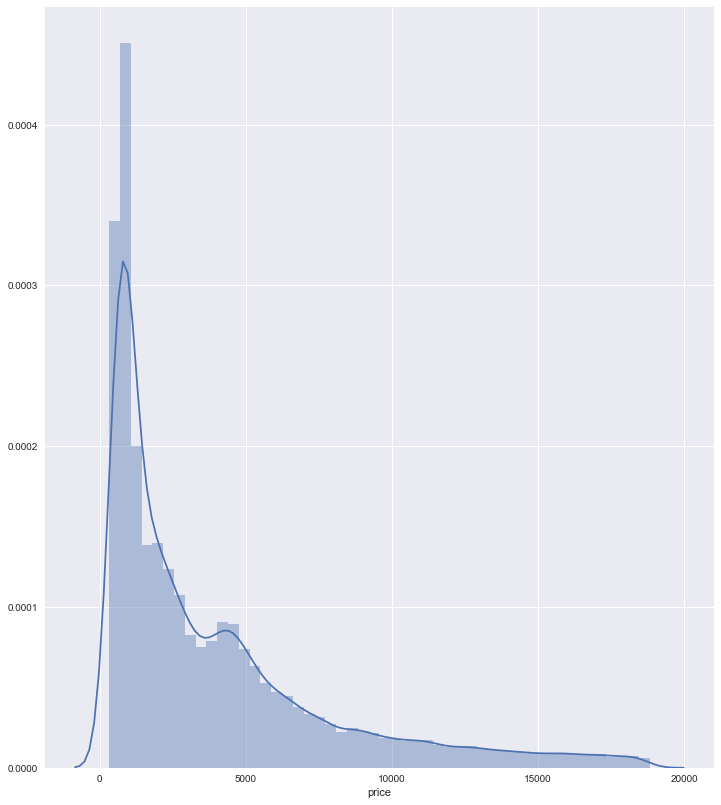

In [145]:
sns.distplot(df.price)

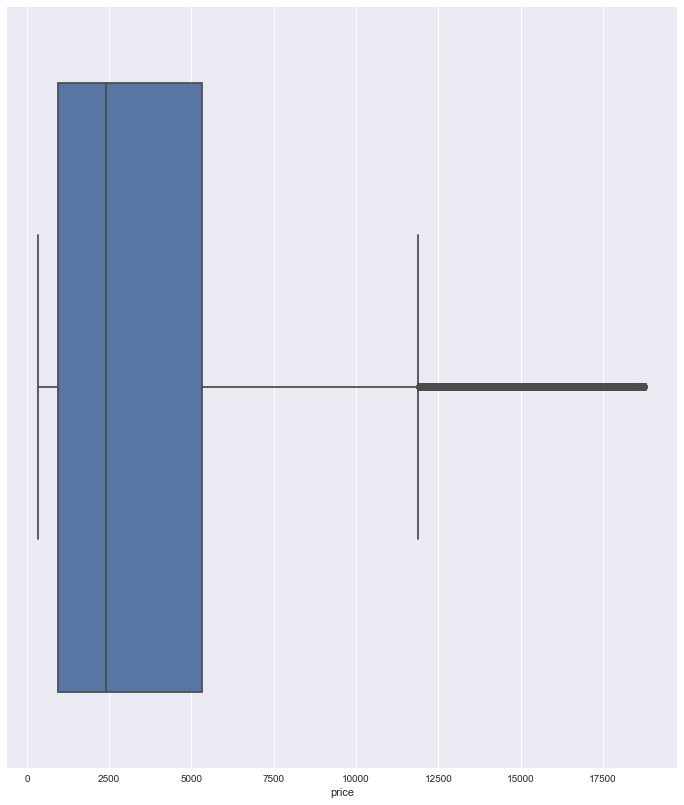

In [45]:
sns.boxplot(x='price', data=df);

In [146]:
for i in df.columns[:-1]:
    min_val = min(df[i].values)
    df[i] = df[i] - min_val
    max_val =  max(df[i].values)
    df[i] = df[i] / max_val

In [147]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.006237,1.00,0.166667,0.142857,0.513889,0.230769,326
1,0.002079,0.75,0.166667,0.285714,0.466667,0.346154,326
2,0.006237,0.25,0.166667,0.571429,0.386111,0.423077,327
3,0.018711,0.75,0.833333,0.428571,0.538889,0.288462,334
4,0.022869,0.25,1.000000,0.142857,0.563889,0.288462,335


Само машинное обучение

In [148]:
X = df[df.columns[:-1]]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [149]:
clf = KNeighborsRegressor(n_neighbors=2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9622351632790868

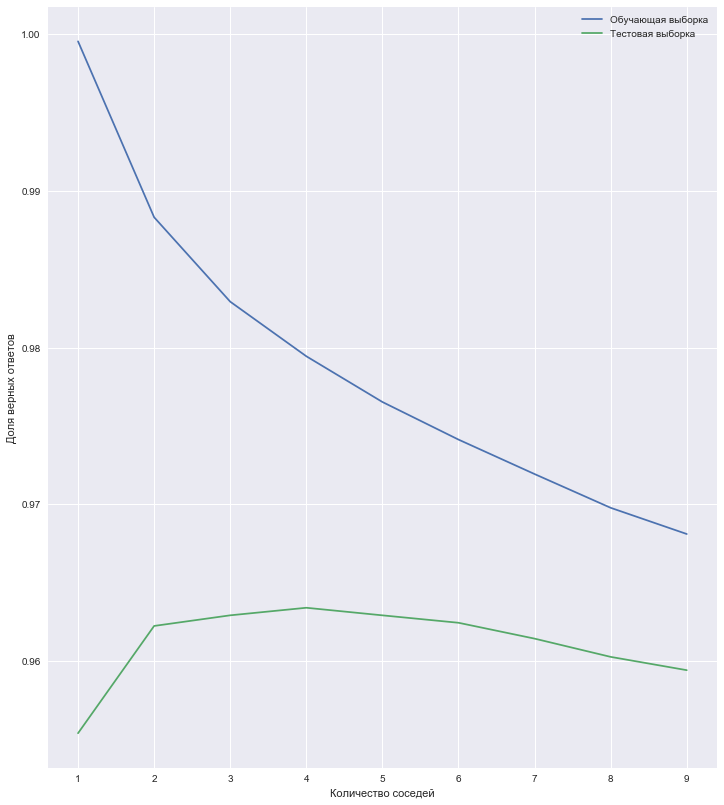

In [150]:
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 10 включительно
for n in range(1, 10):
    clf = KNeighborsRegressor(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(train_scores.keys(), train_scores.values(), label='Обучающая выборка')
plt.plot(test_scores.keys(), test_scores.values(), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [151]:
def mincovsky_metric(arr1, arr2, p):
    if (len(arr1) == len(arr2)):
        sum = 0
        for i in range(len(arr1)):
            sum += (abs(arr1[i] - arr2[i])) ** p
        return (sum ** (1 / p))
    return(0)

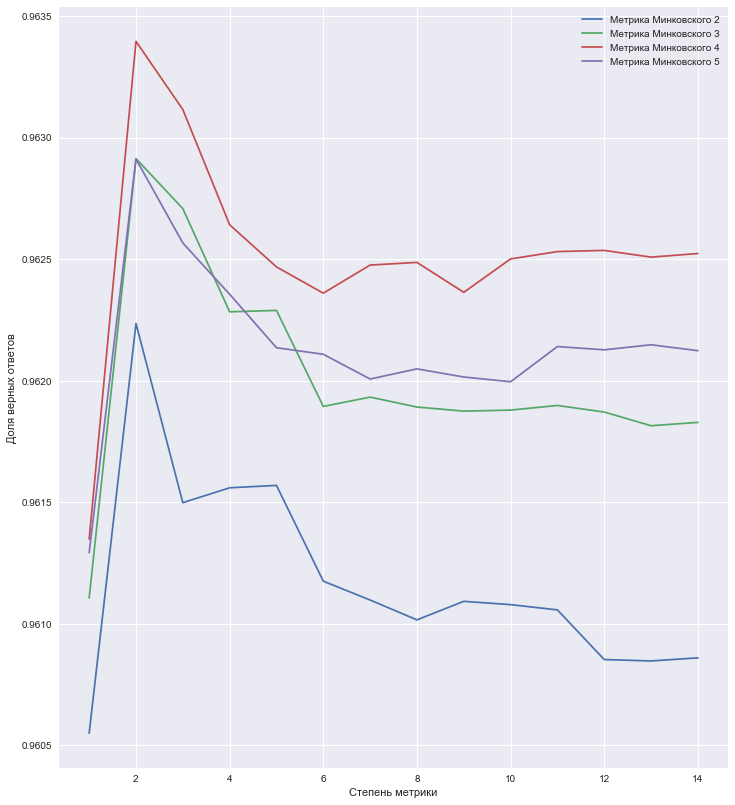

In [152]:
minc = {}
for k in range(2, 6):
    for n in range(1, 15):
        clf = KNeighborsRegressor(n_neighbors=k, p = n)
        clf.fit(X_train, y_train)
        minc[n] = clf.score(X_test, y_test)
    plt.plot(minc.keys(), minc.values(), label='Метрика Минковского ' + str(k))
plt.xlabel('Степень метрики')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

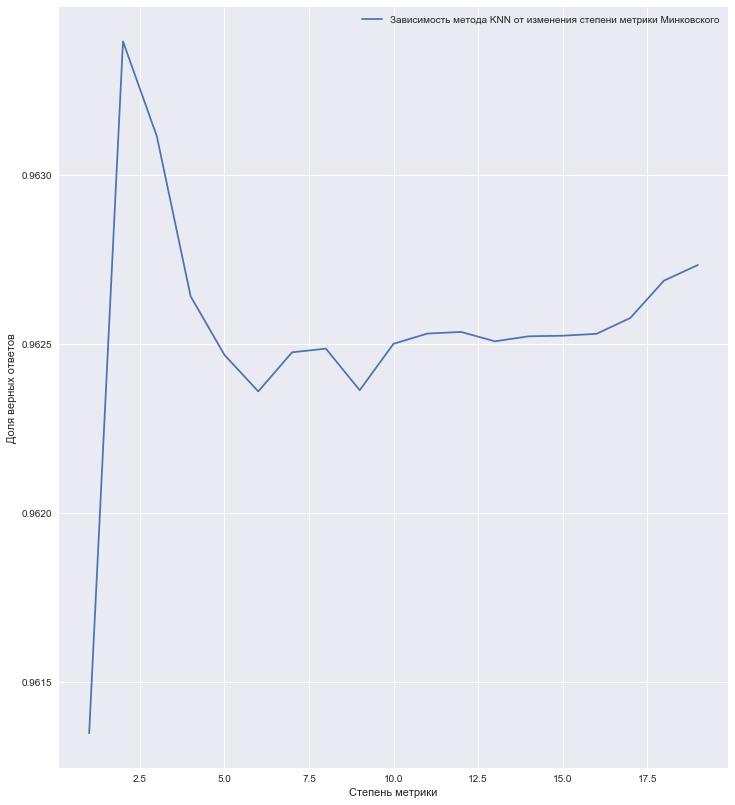

In [153]:
minc = {}
for n in range(1, 20):
    clf = KNeighborsRegressor(n_neighbors=4, p = n)
    clf.fit(X_train, y_train)
    minc[n] = clf.score(X_test, y_test)
plt.plot(minc.keys(), minc.values(), label='Зависимость метода KNN от изменения степени метрики Минковского')
plt.xlabel('Степень метрики')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [154]:
clf = KNeighborsRegressor(n_neighbors=4, p=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9613484274168569

Дерево решений

In [155]:
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9671851490819932

Байесовская гребневая регрессия

In [156]:
bay_ridge = BayesianRidge()
bay_ridge.fit(X_train, y_train)
bay_ridge.score(X_test, y_test)

0.9033923801201553